# Flight Price Prediction
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import plotly.express as px


In [2]:
df = pd.read_excel("train.xlsx")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [5]:
df.describe()

Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
df.dropna(inplace = True)

In [9]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
df["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
40h 20m      1
29h 10m      1
28h 30m      1
32h 20m      1
33h 45m      1
Name: Duration, Length: 368, dtype: int64

In [11]:
df["Price"].value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
9502       1
13875      1
7742       1
5703       1
4098       1
Name: Price, Length: 1870, dtype: int64

---

## EDA

From description we can see that Date_of_Journey is a object data type,\
Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas **to_datetime** to convert object data type to datetime dtype.

dt.day method will extract only day of that date and 
dt.month method will extract only month of that date

In [12]:
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day

In [13]:
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [14]:
df["Journey_dayname"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.day_name()

In [15]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897   
1    05:50         13:15   7h 25m     2 stops         No info   7662   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882   
3    18:05         23:30   5h 25m      1 stop         No info   6218   
4    16:50         21:35   4h 45m      1 stop         No info  13302   

   Journey_day  Journey_month Journey_dayname  
0           24              3          Sunday  
1            1              5       Wednesday  
2            9              6          Sunday  
3           12              5          Sunday  
4            1              3          Friday

In [16]:
df["Journey_dayname"].unique()

array(['Sunday', 'Wednesday', 'Friday', 'Monday', 'Tuesday', 'Saturday',
       'Thursday'], dtype=object)

In [17]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

# Extracting Minutes
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute



In [18]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897   
1    05:50         13:15   7h 25m     2 stops         No info   7662   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882   
3    18:05         23:30   5h 25m      1 stop         No info   6218   
4    16:50         21:35   4h 45m      1 stop         No info  13302   

   Journey_day  Journey_month Journey_dayname  Dep_hour  Dep_min  
0           24              3          Sunday        22       20  
1            1              5       Wednesday         5       50  
2            9              6          Sunday         9       25  
3           12              5          Sunday        18        5  
4            1              3          Friday        16       50

In [19]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour

# Extracting Minutes
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute


In [20]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897   
1    05:50         13:15   7h 25m     2 stops         No info   7662   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882   
3    18:05         23:30   5h 25m      1 stop         No info   6218   
4    16:50         21:35   4h 45m      1 stop         No info  13302   

   Journey_day  Journey_month Journey_dayname  Dep_hour  Dep_min  \
0           24              3          Sunday        22       20   
1            1              5       Wednesday         5       50   
2            9              6          Sunday         9       25   
3           12              5          Sunday        18        5   
4            1              3          Friday        16       50   

   Arrival_hour  Arrival_min  
0             1           10  
1            13           15  
2             4           25  
3            23           30  
4            21           35

In [21]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [22]:
# Adding duration_hours and duration_mins list to train_data dataframe

df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [23]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897   
1    05:50         13:15   7h 25m     2 stops         No info   7662   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882   
3    18:05         23:30   5h 25m      1 stop         No info   6218   
4    16:50         21:35   4h 45m      1 stop         No info  13302   

   Journey_day  Journey_month Journey_dayname  Dep_hour  Dep_min  \
0           24              3          Sunday        22       20   
1            1              5       Wednesday         5       50   
2            9              6          Sunday         9       25   
3           12              5          Sunday        18        5   
4            1              3          Friday        16       50   

   Arrival_hour  Arrival_min  Duration_hours  Duration_mins  
0             1           10               2             50  
1            13           15               7             25  
2             4           25              19              0  
3            23           30               5             25  
4            21           35               4             45

---

## Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,\
1.Nominal data-- data are not in any order OneHotEncoder is used in this case \
2.Ordinal data-- data are in order LabelEncoder is used in this case

In [24]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

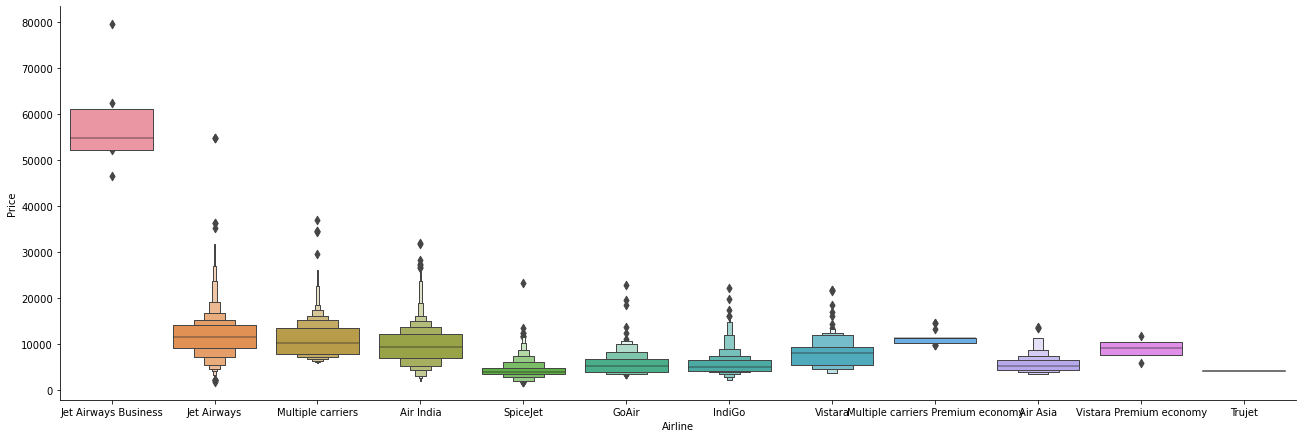

In [25]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [26]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = df[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

Airline_Air India  Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0                  0              0               1                    0   
1                  1              0               0                    0   
2                  0              0               0                    1   
3                  0              0               1                    0   
4                  0              0               1                    0   

   Airline_Jet Airways Business  Airline_Multiple carriers  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   Airline_Multiple carriers Premium economy  Airline_SpiceJet  \
0                                          0                 0   
1                                          0                 0   
2                                          0                 0   
3                                          0                 0   
4                                          0                 0   

   Airline_Trujet  Airline_Vistara  Airline_Vistara Premium economy  
0               0                0                                0  
1               0                0                                0  
2               0                0                                0  
3               0                0                                0  
4               0                0                                0

In [27]:
df["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

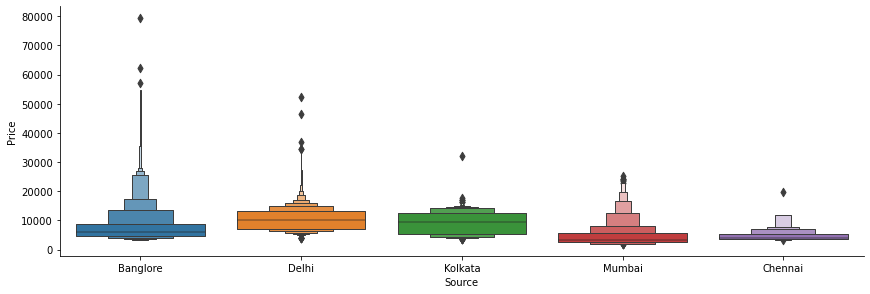

In [28]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [29]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = df[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai
0               0             0               0              0
1               0             0               1              0
2               0             1               0              0
3               0             0               1              0
4               0             0               0              0

In [30]:
df["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [31]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = df[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

Destination_Cochin  Destination_Delhi  Destination_Hyderabad  \
0                   0                  0                      0   
1                   0                  0                      0   
2                   1                  0                      0   
3                   0                  0                      0   
4                   0                  0                      0   

   Destination_Kolkata  Destination_New Delhi  
0                    0                      1  
1                    0                      0  
2                    0                      0  
3                    0                      0  
4                    0                      1

In [32]:
df["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [33]:
df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [34]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [35]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration  Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m            0         No info   3897   
1    05:50         13:15   7h 25m            2         No info   7662   
2    09:25  04:25 10 Jun      19h            2         No info  13882   
3    18:05         23:30   5h 25m            1         No info   6218   
4    16:50         21:35   4h 45m            1         No info  13302   

   Journey_day  Journey_month Journey_dayname  Dep_hour  Dep_min  \
0           24              3          Sunday        22       20   
1            1              5       Wednesday         5       50   
2            9              6          Sunday         9       25   
3           12              5          Sunday        18        5   
4            1              3          Friday        16       50   

   Arrival_hour  Arrival_min  Duration_hours  Duration_mins  
0             1           10               2             50  
1            13           15               7             25  
2             4           25              19              0  
3            23           30               5             25  
4            21           35               4             45

In [36]:
# As Dayname is Nominal Categorical data we will perform OneHotEncoding

Dayname = df[["Journey_dayname"]]

Dayname = pd.get_dummies(Dayname, drop_first = True)

Dayname.head()

Journey_dayname_Monday  Journey_dayname_Saturday  Journey_dayname_Sunday  \
0                       0                         0                       1   
1                       0                         0                       0   
2                       0                         0                       1   
3                       0                         0                       1   
4                       0                         0                       0   

   Journey_dayname_Thursday  Journey_dayname_Tuesday  \
0                         0                        0   
1                         0                        0   
2                         0                        0   
3                         0                        0   
4                         0                        0   

   Journey_dayname_Wednesday  
0                          0  
1                          1  
2                          0  
3                          0  
4                          0

In [37]:
train=pd.concat([df,Airline,Source,Destination,Dayname],axis=1)

In [38]:
train.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration  Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m            0         No info   3897   
1    05:50         13:15   7h 25m            2         No info   7662   
2    09:25  04:25 10 Jun      19h            2         No info  13882   
3    18:05         23:30   5h 25m            1         No info   6218   
4    16:50         21:35   4h 45m            1         No info  13302   

   Journey_day  Journey_month Journey_dayname  Dep_hour  Dep_min  \
0           24              3          Sunday        22       20   
1            1              5       Wednesday         5       50   
2            9              6          Sunday         9       25   
3           12              5          Sunday        18        5   
4            1              3          Friday        16       50   

   Arrival_hour  Arrival_min  Duration_hours  Duration_mins  \
0             1           10               2             50   
1            13           15               7             25   
2             4           25              19              0   
3            23           30               5             25   
4            21           35               4             45   

   Airline_Air India  Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0                  0              0               1                    0   
1                  1              0               0                    0   
2                  0              0               0                    1   
3                  0              0               1                    0   
4                  0              0               1                    0   

   Airline_Jet Airways Business  Airline_Multiple carriers  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   Airline_Multiple carriers Premium economy  Airline_SpiceJet  \
0                                          0                 0   
1                                          0                 0   
2                                          0                 0   
3                                          0                 0   
4                                          0                 0   

   Airline_Trujet  Airline_Vistara  Airline_Vistara Premium economy  \
0               0                0                                0   
1               0                0                                0   
2               0                0                                0   
3               0                0                                0   
4               0                0                                0   

   Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai  \
0               0             0               0              0   
1               0             0               1              0   
2               0             1               0              0   
3               0             0               1              0   
4               0             0               0              0   

   Destination_Cochin  Destination_Delhi  Destination_Hyderabad  \
0                   0                  0                      0   
1                   0                  0                      0   
2                   1                  0             

In [39]:
train.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration  Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m            0         No info   3897   
1    05:50         13:15   7h 25m            2         No info   7662   
2    09:25  04:25 10 Jun      19h            2         No info  13882   
3    18:05         23:30   5h 25m            1         No info   6218   
4    16:50         21:35   4h 45m            1         No info  13302   

   Journey_day  Journey_month Journey_dayname  Dep_hour  Dep_min  \
0           24              3          Sunday        22       20   
1            1              5       Wednesday         5       50   
2            9              6          Sunday         9       25   
3           12              5          Sunday        18        5   
4            1              3          Friday        16       50   

   Arrival_hour  Arrival_min  Duration_hours  Duration_mins  \
0             1           10               2             50   
1            13           15               7             25   
2             4           25              19              0   
3            23           30               5             25   
4            21           35               4             45   

   Airline_Air India  Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0                  0              0               1                    0   
1                  1              0               0                    0   
2                  0              0               0                    1   
3                  0              0               1                    0   
4                  0              0               1                    0   

   Airline_Jet Airways Business  Airline_Multiple carriers  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   Airline_Multiple carriers Premium economy  Airline_SpiceJet  \
0                                          0                 0   
1                                          0                 0   
2                                          0                 0   
3                                          0                 0   
4                                          0                 0   

   Airline_Trujet  Airline_Vistara  Airline_Vistara Premium economy  \
0               0                0                                0   
1               0                0                                0   
2               0                0                                0   
3               0                0                                0   
4               0                0                                0   

   Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai  \
0               0             0               0              0   
1               0             0               1              0   
2               0             1               0              0   
3               0             0               1              0   
4               0             0               0              0   

   Destination_Cochin  Destination_Delhi  Destination_Hyderabad  \
0                   0                  0                      0   
1                   0                  0                      0   
2                   1                  0             

In [40]:
max(df.Price)

79512

In [41]:
col=['Total_Stops', 'Journey_month',
        'Journey_dayname', 'Dep_hour',
          'Airline',
        'Source',
        'Destination']

px.bar(data_frame=df, x = 'Total_Stops', y = ['Price'], barmode="group",
       title= 'Price_vs_Toatal_Stops',color='Total_Stops',template='plotly_white')



px.bar(data_frame=df, x = 'Journey_month', y = ['Price'], barmode="group",
       title= 'Price_vs_Journey_month',color='Journey_month',template='plotly_white')

px.bar(data_frame=df, x = 'Journey_dayname', y = ['Price'], barmode="group",
       title= 'Price_vs_Journey_dayname',color='Journey_dayname',template='plotly_white')
    


px.bar(data_frame=df, x = 'Dep_hour', y = ['Price'], barmode="group",
       title= 'Price_vs_Dep_hour',color='Dep_hour',template='plotly_white')
    


px.bar(data_frame=df, x = 'Airline', y = ['Price'],
       title= 'Price_vs_Airline',color='Airline',template='plotly_white')
    


px.box(data_frame=df, x = 'Airline', y = ['Price'], 
       title= 'Price_vs_Airline',color='Airline',template='plotly_white')

px.density_contour(data_frame=df, x = 'Airline', y = ['Price'], 
       title= 'Price_vs_Airline',color='Airline',template='plotly_white')

px.density_heatmap(data_frame=df, x = 'Airline', y = ['Price'], 
       title= 'Price_vs_Airline',template='plotly_white')

px.funnel(data_frame=df, x = 'Airline', y = ['Price'], 
       title= 'Price_vs_Airline',color='Airline',template='plotly_white')

px.histogram(data_frame=df, x = 'Airline', y = ['Price'], 
       title= 'Price_vs_Airline',color='Airline',template='plotly_white')

px.line(data_frame=df, x = 'Airline', y = ['Price'], 
       title= 'Price_vs_Airline',color='Airline',template='plotly_white')

px.violin(data_frame=df, x = 'Airline', y = ['Price'], 
       title= 'Price_vs_Airline',color='Airline',template='plotly_white')

px.bar(data_frame=df, x = 'Source', y = ['Price'], barmode="group",
       title= 'Price_vs_Source',color='Source',template='plotly_white')
    


px.bar(data_frame=df, x = 'Destination', y = ['Price'], barmode="group",
       title= 'Price_vs_Destination',color='Destination',template='plotly_white')

In [42]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

train.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [43]:
# Now we can drop Dep_Time as it is of no use
train.drop(["Dep_Time"], axis = 1, inplace = True)

In [44]:

# Now we can drop Arrival_Time as it is of no use
train.drop(["Arrival_Time"], axis = 1, inplace = True)

In [45]:
train.drop(["Duration"], axis = 1, inplace = True)

In [46]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

train.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [47]:
train.drop(["Airline", "Source", "Destination",'Journey_dayname'], axis = 1, inplace = True)


In [48]:
train.shape

(10682, 36)

In [49]:
train.head()

Total_Stops  Price  Journey_day  Journey_month  Dep_hour  Dep_min  \
0            0   3897           24              3        22       20   
1            2   7662            1              5         5       50   
2            2  13882            9              6         9       25   
3            1   6218           12              5        18        5   
4            1  13302            1              3        16       50   

   Arrival_hour  Arrival_min  Duration_hours  Duration_mins  \
0             1           10               2             50   
1            13           15               7             25   
2             4           25              19              0   
3            23           30               5             25   
4            21           35               4             45   

   Airline_Air India  Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0                  0              0               1                    0   
1                  1              0               0                    0   
2                  0              0               0                    1   
3                  0              0               1                    0   
4                  0              0               1                    0   

   Airline_Jet Airways Business  Airline_Multiple carriers  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   Airline_Multiple carriers Premium economy  Airline_SpiceJet  \
0                                          0                 0   
1                                          0                 0   
2                                          0                 0   
3                                          0                 0   
4                                          0                 0   

   Airline_Trujet  Airline_Vistara  Airline_Vistara Premium economy  \
0               0                0                                0   
1               0                0                                0   
2               0                0                                0   
3               0                0                                0   
4               0                0                                0   

   Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai  \
0               0             0               0              0   
1               0             0               1              0   
2               0             1               0              0   
3               0             0               1              0   
4               0             0               0              0   

   Destination_Cochin  Destination_Delhi  Destination_Hyderabad  \
0                   0                  0                      0   
1                   0                  0                      0   
2                   1                  0                      0   
3                   0                  0                      0   
4                   0                  0                      0   

   Destination_Kolkata  Destination_New Delhi  Journey_dayname_Monday  \
0                    0                      1                       0   
1                    0                      0                       0   
2                    0                      0                       0   
3                    0                      0                       0   
4                    0                      1                       0   

   Journey_dayname_Saturday  Journey_dayname_Sunday  Journey_dayname_Thursday  \
0                         0                       1                         0   
1                         0                       0                         0   
2                         0                       1    

---

## Test set

In [50]:
test_data=pd.read_excel('test.xlsx')

In [51]:
test_data.Airline.unique()

array(['Jet Airways', 'IndiGo', 'Multiple carriers', 'Air Asia',
       'Air India', 'Vistara', 'SpiceJet', 'Vistara Premium economy',
       'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business'], dtype=object)

In [52]:
test_data.head()

Airline Date_of_Journey    Source Destination            Route  \
0        Jet Airways       6/06/2019     Delhi      Cochin  DEL → BOM → COK   
1             IndiGo      12/05/2019   Kolkata    Banglore  CCU → MAA → BLR   
2        Jet Airways      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
3  Multiple carriers      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
4           Air Asia      24/06/2019  Banglore       Delhi        BLR → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops              Additional_Info  
0    17:30  04:25 07 Jun  10h 55m      1 stop                      No info  
1    06:20         10:20       4h      1 stop                      No info  
2    19:15  19:00 22 May  23h 45m      1 stop  In-flight meal not included  
3    08:00         21:00      13h      1 stop                      No info  
4    23:55  02:45 25 Jun   2h 50m    non-stop                      No info

In [69]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data["Journey_dayname"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.day_name()
#test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
#test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
#test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
#test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = test_data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source=test_data[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination=test_data[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)

# As Dayname is Nominal Categorical data we will perform OneHotEncoding
print('Journey_dayname')
print("-"*75)
print(test_data["Journey_dayname"].value_counts())
Dayname=test_data[["Journey_dayname"]]
Dayname = pd.get_dummies(Dayname, drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
#test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination,Dayname], axis = 1)
data_test.drop(["Date_of_Journey"], axis = 1, inplace = True)
data_test.drop(["Dep_Time"], axis = 1, inplace = True)
data_test.drop(["Arrival_Time"], axis = 1, inplace = True)
data_test.drop(["Duration"], axis = 1, inplace = True)
data_test.drop(["Route", "Additional_Info"], axis = 1, inplace = True)
data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
data_test.drop(["Journey_dayname"], axis = 1, inplace = True)
#col=np.zeros(len(data_test))
#data_test.iloc[:,18]=pd.DataFrame(col,columns='Airline_Trujet')

#data_test['Airline_Trujet']=col
print()
print()

print("Shape of test data : ", data_test.shape)



Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2671 entries, 0 to 2670
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   int64 
 9   Additional_Info  2671 non-null   object
 10  Journey_day      2671 non-null   int64 
 11  Journey_month    2671 non-null   int64 
 12  Journey_dayname  2671 non-null   object
 13  Dep_hour         2671 non-null   int64 
 14  Dep_min          2671 non-null   int64 
 15  Arrival_hour     2671 non-null  

In [70]:
data_test.head()

Total_Stops  Journey_day  Journey_month  Dep_hour  Dep_min  Arrival_hour  \
0            1            6              6        17       30             4   
1            1           12              5         6       20            10   
2            1           21              5        19       15            19   
3            1           21              5         8        0            21   
4            0           24              6        23       55             2   

   Arrival_min  Duration_hours  Duration_mins  Airline_Air India  \
0           25              10             55                  0   
1           20               4              0                  0   
2            0              23             45                  0   
3            0              13              0                  0   
4           45               2             50                  0   

   Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0              0               0                    1   
1              0               1                    0   
2              0               0                    1   
3              0               0                    0   
4              0               0                    0   

   Airline_Jet Airways Business  Airline_Multiple carriers  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          1   
4                             0                          0   

   Airline_Multiple carriers Premium economy  Airline_SpiceJet  \
0                                          0                 0   
1                                          0                 0   
2                                          0                 0   
3                                          0                 0   
4                                          0                 0   

   Airline_Vistara  Airline_Vistara Premium economy  Source_Chennai  \
0                0                                0               0   
1                0                                0               0   
2                0                                0               0   
3                0                                0               0   
4                0                                0               0   

   Source_Delhi  Source_Kolkata  Source_Mumbai  Destination_Cochin  \
0             1               0              0                   1   
1             0               1              0                   0   
2             1               0              0                   1   
3             1               0              0                   1   
4             0               0              0                   0   

   Destination_Delhi  Destination_Hyderabad  Destination_Kolkata  \
0                  0                      0                    0   
1                  0                      0                    0   
2                  0                      0                    0   
3                  0                      0                    0   
4                  1                      0                    0   

   Destination_New Delhi  Journey_dayname_Monday  Journey_dayname_Saturday  \
0                      0                       0                         0   
1                      0                       0                         0   
2                      0                       0                         0   
3                      0                       0                         0   
4                      0                       1                         0   

   Journey_dayname_Sunday  Journey_dayname_Thursday  Journey_dayname_Tuesday  \
0                       0                         1                        0   
1                       1                         0                        0   
2                       0               

---

## Feature Selection

Finding out the best feature which will contribute and have good relation with target variable.
Following are some of the feature selection methods,


1.heatmap \
2.feature_importance_


In [71]:
train.shape

(10682, 36)

In [72]:
train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi',
       'Journey_dayname_Monday', 'Journey_dayname_Saturday',
       'Journey_dayname_Sunday', 'Journey_dayname_Thursday',
       'Journey_dayname_Tuesday', 'Journey_dayname_Wednesday'],
      dtype='object')

In [73]:
x = train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi',
       'Journey_dayname_Monday', 'Journey_dayname_Saturday',
       'Journey_dayname_Sunday', 'Journey_dayname_Thursday',
       'Journey_dayname_Tuesday', 'Journey_dayname_Wednesday']]
x.head()

Total_Stops  Journey_day  Journey_month  Dep_hour  Dep_min  Arrival_hour  \
0            0           24              3        22       20             1   
1            2            1              5         5       50            13   
2            2            9              6         9       25             4   
3            1           12              5        18        5            23   
4            1            1              3        16       50            21   

   Arrival_min  Duration_hours  Duration_mins  Airline_Air India  \
0           10               2             50                  0   
1           15               7             25                  1   
2           25              19              0                  0   
3           30               5             25                  0   
4           35               4             45                  0   

   Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0              0               1                    0   
1              0               0                    0   
2              0               0                    1   
3              0               1                    0   
4              0               1                    0   

   Airline_Jet Airways Business  Airline_Multiple carriers  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   Airline_Multiple carriers Premium economy  Airline_SpiceJet  \
0                                          0                 0   
1                                          0                 0   
2                                          0                 0   
3                                          0                 0   
4                                          0                 0   

   Airline_Trujet  Airline_Vistara  Airline_Vistara Premium economy  \
0               0                0                                0   
1               0                0                                0   
2               0                0                                0   
3               0                0                                0   
4               0                0                                0   

   Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai  \
0               0             0               0              0   
1               0             0               1              0   
2               0             1               0              0   
3               0             0               1              0   
4               0             0               0              0   

   Destination_Cochin  Destination_Delhi  Destination_Hyderabad  \
0                   0                  0                      0   
1                   0                  0                      0   
2                   1                  0                      0   
3                   0                  0                      0   
4                   0                  0                      0   

   Destination_Kolkata  Destination_New Delhi  Journey_dayname_Monday  \
0                    0                      1                       0   
1                    0                      0                       0   
2                    0                      0                       0   
3                    0                      0                       0   
4                    0                      1                       0   

   Journey_dayname_Saturday  Journey_dayname_Sunday  Journey_dayname_Thursday  \
0                         0                       1                         0   
1                         0                       0                         0   
2                         0                       1                         0   
3               

In [74]:
y = train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

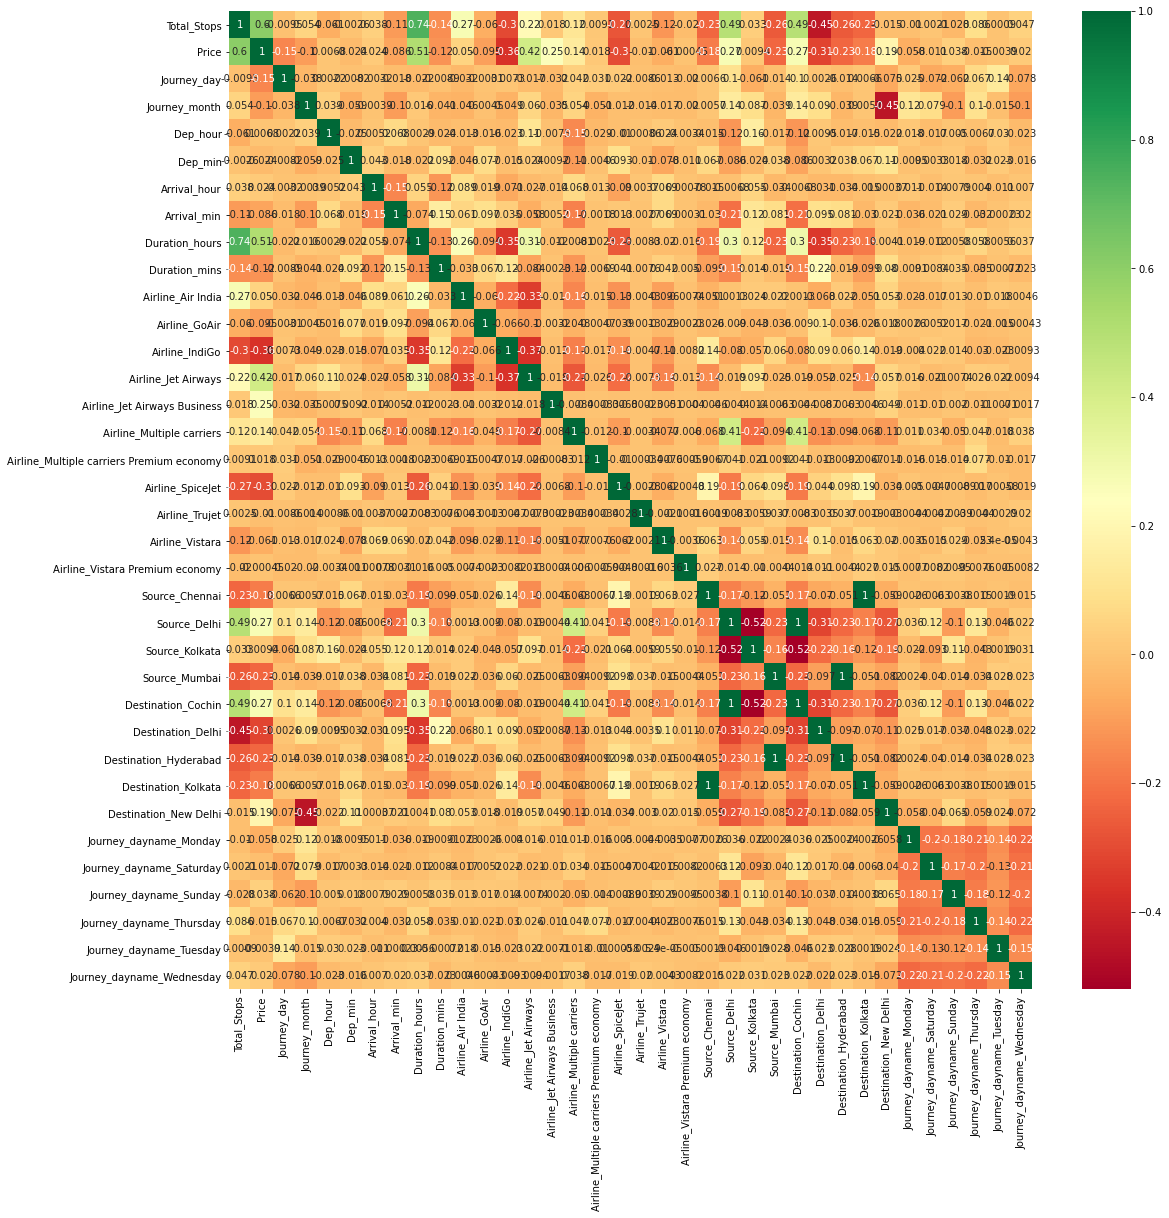

In [75]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [76]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

In [77]:
print(selection.feature_importances_)

[2.32702647e-01 1.02367921e-01 5.01186083e-02 2.44985269e-02
 2.12115654e-02 2.82580181e-02 1.90634426e-02 1.15438929e-01
 1.73574400e-02 9.31280950e-03 1.75422286e-03 1.74106081e-02
 1.42403348e-01 6.78149191e-02 2.13508362e-02 8.99227060e-04
 3.07544970e-03 1.22827543e-04 4.94558783e-03 9.69078814e-05
 5.62217284e-04 5.18437879e-03 3.38695818e-03 6.35443552e-03
 1.29787883e-02 1.45548195e-02 7.11842024e-03 5.29745070e-04
 2.48112148e-02 7.90140029e-03 4.24727117e-03 9.55964994e-03
 8.80484107e-03 4.90383280e-03 8.89818480e-03]


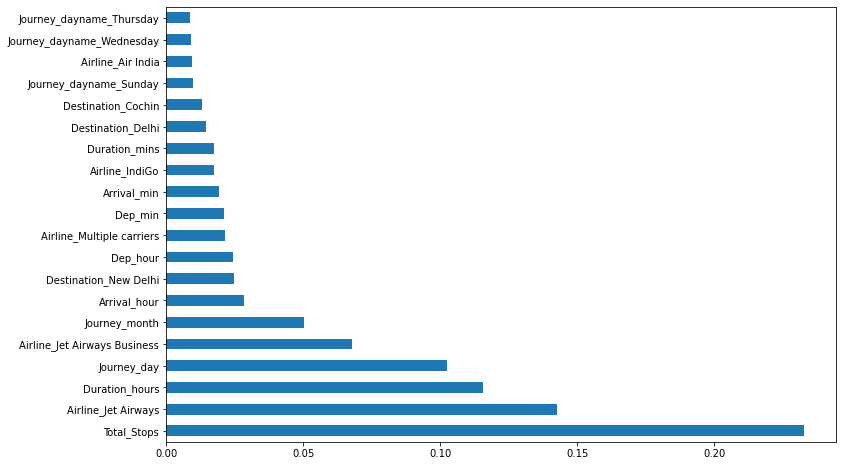

In [78]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


---

## Fitting model using Random Forest

1. Split dataset into train and test set in order to prediction w.r.t X_test
2. If needed do scaling of data
    * Scaling is not done in Random forest
3. Import model
4. Fit the data
5. Predict w.r.t X_test
6. In regression check **RSME** Score
7. Plot graph

In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [80]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor



from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

def find_best_model_using_gridsearchcv(x,y):
    algos = { 
        'XGBRegressor' : {
            'model': XGBRegressor(),
            'params': {
                'n_estimators': [5,100],'max_depth':[2,7],'n_jobs':[2,4,6],'num_parallel_tree':[1,2]
            }
        },
        
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'ridge_regression' : {
            'model': Ridge(),
            'params': {
                'alpha': [0.1,0.3,0.5,1]
            }
        },
        'random_forest_regressor' : {
            'model': RandomForestRegressor(),
            'params': {
                'max_depth': [1,2]
            }
        },
        'KNeighborsRegressor' : {
            'model': KNeighborsRegressor(),
            'params': {
                'n_neighbors': [1,2]
            }
        },
        'SVM' : {
            'model': SVR(gamma='auto'),
            'params': {
                'C': [1],'kernel':['rbf','linear']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

acc=find_best_model_using_gridsearchcv(x_train,y_train)
acc

model  best_score  \
0             XGBRegressor    0.809901   
1        linear_regression    0.644639   
2                    lasso    0.646639   
3            decision_tree    0.701435   
4         ridge_regression    0.647081   
5  random_forest_regressor    0.510528   
6      KNeighborsRegressor    0.537725   
7                      SVM    0.391476   

                                         best_params  
0  {'max_depth': 7, 'n_estimators': 100, 'n_jobs'...  
1                               {'normalize': False}  
2                {'alpha': 2, 'selection': 'cyclic'}  
3         {'criterion': 'mse', 'splitter': 'random'}  
4                                     {'alpha': 0.5}  
5                                   {'max_depth': 2}  
6                                 {'n_neighbors': 2}  
7                       {'C': 1, 'kernel': 'linear'}

In [81]:
accuracy=pd.DataFrame(acc)

In [82]:
accuracy

model  best_score  \
0             XGBRegressor    0.809901   
1        linear_regression    0.644639   
2                    lasso    0.646639   
3            decision_tree    0.701435   
4         ridge_regression    0.647081   
5  random_forest_regressor    0.510528   
6      KNeighborsRegressor    0.537725   
7                      SVM    0.391476   

                                         best_params  
0  {'max_depth': 7, 'n_estimators': 100, 'n_jobs'...  
1                               {'normalize': False}  
2                {'alpha': 2, 'selection': 'cyclic'}  
3         {'criterion': 'mse', 'splitter': 'random'}  
4                                     {'alpha': 0.5}  
5                                   {'max_depth': 2}  
6                                 {'n_neighbors': 2}  
7                       {'C': 1, 'kernel': 'linear'}

<AxesSubplot:xlabel='model', ylabel='best_score'>

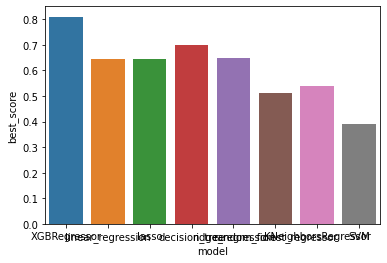

In [83]:
sns.barplot(x='model',y='best_score',data=accuracy)

In [84]:
px.bar(data_frame=accuracy, x = 'model', y = 'best_score', barmode="group",
       title= 'Accuracy comparison of different models',color='model',template='plotly_white')
    


In [87]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [88]:
y_pred = reg_rf.predict(x_test)

In [89]:
reg_rf.score(x_train, y_train)

0.9542176911010473

In [90]:
reg_rf.score(x_test, y_test)

0.7991763639192819

C:\Users\Bhaskar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



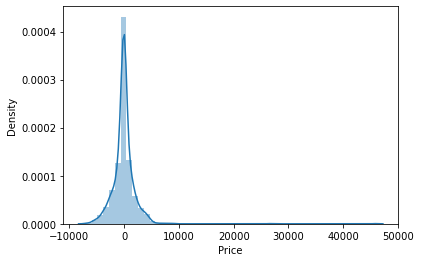

In [91]:
sns.distplot(y_test-y_pred)
plt.show()

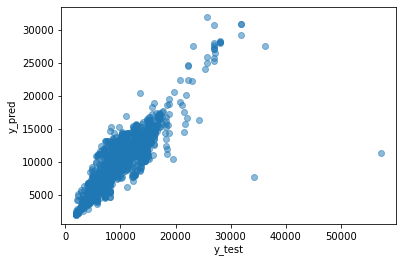

In [92]:

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [93]:
from sklearn import metrics

In [94]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1177.9336804899722
MSE: 4330170.552395414
RMSE: 2080.906185390253


In [95]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.026887077025966846

In [96]:
metrics.r2_score(y_test, y_pred)

0.7991763639192819

---

## Hyperparameter Tuning


* Choose following method for hyperparameter tuning
    1. **RandomizedSearchCV** --> Fast
    2. **GridSearchCV**
* Assign hyperparameters in form of dictionery
* Fit the model
* Check best paramters and best score

In [97]:
from sklearn.model_selection import RandomizedSearchCV

In [98]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [99]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [100]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [103]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   8.4s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.9s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  7.4min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [104]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [105]:
prediction = rf_random.predict(x_test)

C:\Users\Bhaskar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



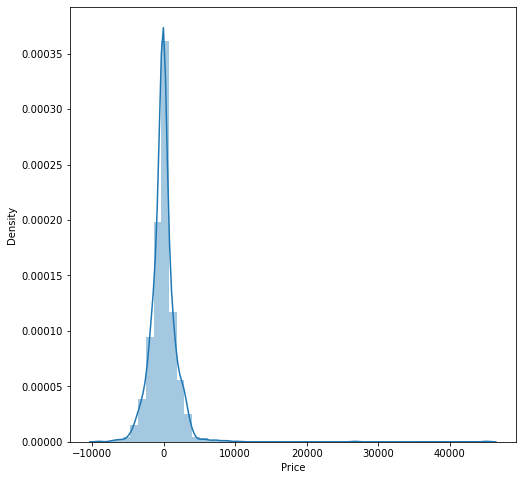

In [106]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

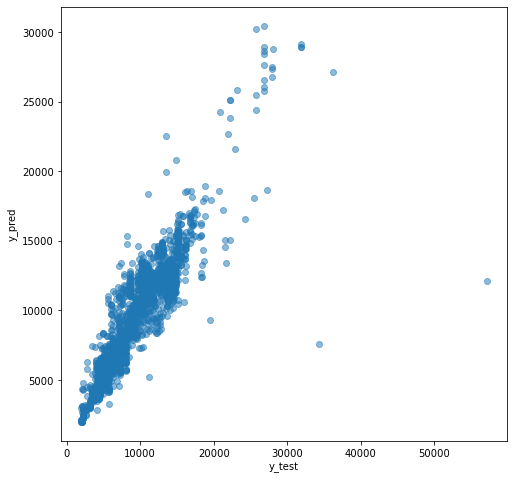

In [107]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [108]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1164.29715632645
MSE: 4041728.6704152133
RMSE: 2010.405101071725


---

## Save the model to reuse it again

In [109]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [110]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [113]:
y_prediction = forest.predict(x_test)

In [114]:
metrics.r2_score(y_test, y_prediction)

0.8125536539904974

---

# TRY


In [243]:
data_test.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Journey_dayname_Monday',
       'Journey_dayname_Saturday', 'Journey_dayname_Sunday',
       'Journey_dayname_Thursday', 'Journey_dayname_Tuesday',
       'Journey_dayname_Wednesday'],
      dtype='object')

In [244]:
X.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi',
       'Journey_dayname_Monday', 'Journey_dayname_Saturday',
       'Journey_dayname_Sunday', 'Journey_dayname_Thursday',
       'Journey_dayname_Tuesday', 'Journey_dayname_Wednesday'],
      dtype='object')

In [245]:
data_test.shape

(2671, 34)

In [246]:
X.shape

(10682, 35)

In [92]:
tests={}
for train,test in zip(X.columns,data_test.columns):
    if train==test:
        tests[train]=data_test[train]
    

{'Total_Stops': 0       1
 1       1
 2       1
 3       1
 4       0
        ..
 2666    1
 2667    0
 2668    1
 2669    1
 2670    1
 Name: Total_Stops, Length: 2671, dtype: int64,
 'Journey_day': 0        6
 1       12
 2       21
 3       21
 4       24
         ..
 2666     6
 2667    27
 2668     6
 2669     6
 2670    15
 Name: Journey_day, Length: 2671, dtype: int64,
 'Journey_month': 0       6
 1       5
 2       5
 3       5
 4       6
        ..
 2666    6
 2667    3
 2668    3
 2669    3
 2670    6
 Name: Journey_month, Length: 2671, dtype: int64,
 'Dep_hour': 0       17
 1        6
 2       19
 3        8
 4       23
         ..
 2666    20
 2667    14
 2668    21
 2669     4
 2670     4
 Name: Dep_hour, Length: 2671, dtype: int64,
 'Dep_min': 0       30
 1       20
 2       15
 3        0
 4       55
         ..
 2666    30
 2667    20
 2668    50
 2669     0
 2670    55
 Name: Dep_min, Length: 2671, dtype: int64,
 'Arrival_hour': 0        4
 1       10
 2       19
 3   

In [ ]:
tests1=pd.DataFrame()

In [225]:
col

array([0., 0., 0., ..., 0., 0., 0.])

In [313]:
a=x.iloc[0,:]

In [315]:
a.to_csv('columns.csv')

In [118]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
def find_best_model_using_gridsearchcv(x,y):
    algos = { 'random_forest_regressor' : {
            'model': RandomForestRegressor(),
            'params':  {'n_estimators': [700],
                         'min_samples_split': [15],
                         'min_samples_leaf': [1],
                         'max_features': ['auto'],
                         'max_depth': [20]}
                                    }
            }

    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

acc=find_best_model_using_gridsearchcv(x_train,y_train)
acc

model  best_score  \
0  random_forest_regressor    0.827504   

                                         best_params  
0  {'max_depth': 20, 'max_features': 'auto', 'min...